# Iris classification



## Step1- Importing required libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

## Step2- Retrieve the  data

In [7]:
iris = pd.read_csv('IRIS.csv')

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step3-Analyse the data

**Check if there is no missing data in Iris dataset.**

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Check that the classes are well balanced.**
You can use coutplot from sns.

<Axes: xlabel='species', ylabel='count'>

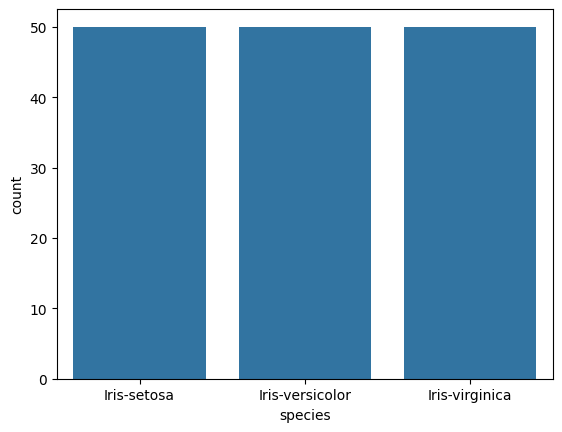

In [10]:
sns.countplot(x='species',data=iris)

## Step4- Preparing the data into train and test

**Put the dataset features in X and labels in y.**

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head(150)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

**Split the data into training set and testing set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**

Let's assume we decided to split the dataset into 60% train data and 40% test data.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Feature Normalization/Scaling

In KNN classifier the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Then, if the range of values of raw data varies widely, we should normalize features to be on the same scale.

**Rescale features using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class** 

/!\ Rescale the test data using the mean and standard deviation of the test set.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
print(scaler.mean_)
print(scaler.var_)

[5.90444444 3.11111111 3.84666667 1.24888889]
[0.71198025 0.17987654 3.33448889 0.65560988]


In [21]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test) #With data of the train because we are not suppose
#to know the data of the test

**Put X_train scaled and y_train scaled in a dataframe format using [pd.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)**

In [22]:
column_list = X_train.columns
column_list

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
X_train_scaled = pd.DataFrame(data=X_train_norm,columns=column_list)
X_test_scaled = pd.DataFrame(data=X_test_norm,columns=column_list)

In [24]:
X_train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.545936,0.681151,-1.339862,-1.171906
1,0.587298,0.209585,0.357783,0.310130
2,2.127967,-1.205114,1.672090,1.298153
3,0.468785,0.681151,0.960174,1.421656
4,-0.597832,-0.261981,0.357783,0.310130


**Visualize the effect of normalization on data using distplot from seaborn**

You can sea this effect on only on sepal_length. You can color the data befor normalization in red and after normalization in green by setting the color parameter in distplot.

C:\Users\DellGhofrane\AppData\Local\Temp\ipykernel_11380\1680337446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled['sepal_length'],color='green')
C:\Users\DellGhofrane\AppData\Local\Temp\ipykernel_11380\1680337446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['s

<Axes: xlabel='sepal_length', ylabel='Density'>

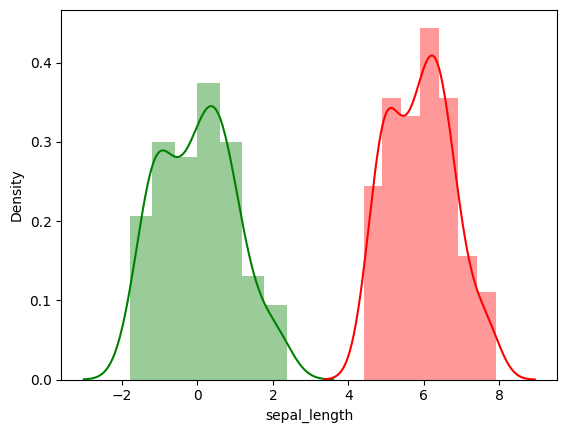

In [25]:
sns.distplot(X_train_scaled['sepal_length'],color='green')
sns.distplot(X_train['sepal_length'],color='red')

In [26]:
X_train_scaled.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,90.00,90.00,90.00,90.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01
min,-1.78,-2.62,-1.45,-1.42
25%,-0.95,-0.73,-1.23,-1.17
50%,0.11,-0.03,0.36,0.25
75%,0.59,0.68,0.78,0.80
max,2.36,3.04,1.67,1.55


## Step5 and 6-**Import KNeighborsClassifier from scikit learn.** Build a KNN model for classification and train the model 
In step5 we will build a kNN classifiation model with precising the number of k.
In step 6 we will train the data using this KNN model.

**Import KNeighborsClassifier from scikit learn.**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [28]:
KNN = KNeighborsClassifier(n_neighbors=7)

**Fit this KNN model to the training data.** 

you should use the scaled one.

In [29]:
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

## Step7- Prediction and evaluation

**Use the predict method to predict values using your KNN model and X_test.**

In [30]:
y_pred = KNN.predict(X_test_scaled)

## Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
Take a look at the following script: [help](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Create a confusion matrix and classification report.**

In [31]:
from sklearn import metrics

In [32]:
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        26
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

[[19  0  0]
 [ 0 26  0]
 [ 0  0 15]]


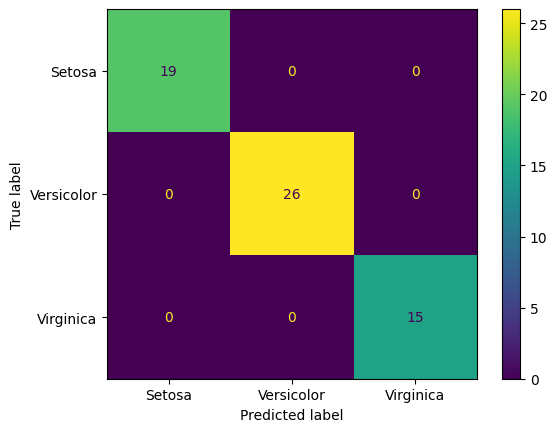

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()

Check the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and mean_squared_error methods from sklearn.metrics to evaluate your model.

In [34]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [35]:
from sklearn.metrics import roc_auc_score
y_scores = KNN.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_scores,multi_class = "ovr")

1.0

----
## How Choose K

In [36]:
vect_error = []

for k in range (1,41):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train_scaled,y_train)
    y_pred = KNN.predict(X_test_scaled)
    error = np.mean(y_pred != y_test) #= somme des mauvaises prédictions / somme des prédictions
    vect_error.append(error)

In [37]:
print(vect_error)

[0.05, 0.05, 0.03333333333333333, 0.03333333333333333, 0.016666666666666666, 0.016666666666666666, 0.0, 0.03333333333333333, 0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.03333333333333333, 0.05, 0.03333333333333333, 0.05, 0.05, 0.06666666666666667, 0.06666666666666667, 0.05, 0.06666666666666667, 0.08333333333333333, 0.05, 0.06666666666666667, 0.05, 0.05, 0.06666666666666667, 0.13333333333333333, 0.08333333333333333, 0.11666666666666667, 0.11666666666666667, 0.13333333333333333, 0.11666666666666667, 0.13333333333333333, 0.1, 0.1, 0.1, 0.11666666666666667, 0.1, 0.1]


**Plot the error vector and conclude which k is more suitable for the classification with KNN**

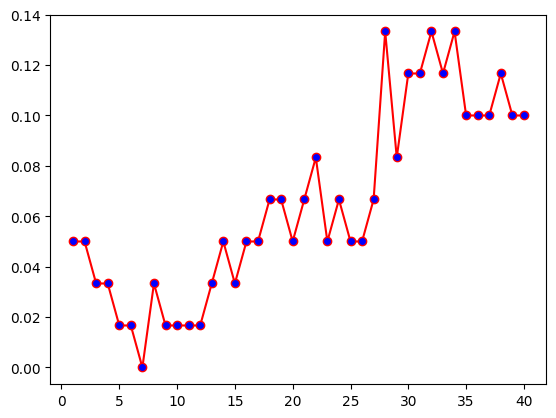

In [38]:
plt.plot(range(1,41),vect_error,marker = 'o', color = 'red', markerfacecolor='blue')

In [39]:
# K idéal : 7

In [40]:
minimum = np.argmin(vect_error)
print(minimum+1)

7


In [41]:
import os
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

In [42]:
os.makedirs("./../SavedModels", exist_ok=True)

In [43]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)